In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/7/data.csv")

In [3]:
data.head()

,Year,Anomaly
0,1874,-0.23
1,1875,-0.22
2,1876,-0.24
3,1877,0.12
4,1878,0.12


In [4]:
data["Year"] = pd.to_datetime(data["Year"], format="%Y")

In [5]:
data.index = data['Year']
del data['Year']
print(data.head())

            Anomaly
Year               
1874-01-01    -0.23
1875-01-01    -0.22
1876-01-01    -0.24
1877-01-01     0.12
1878-01-01     0.12


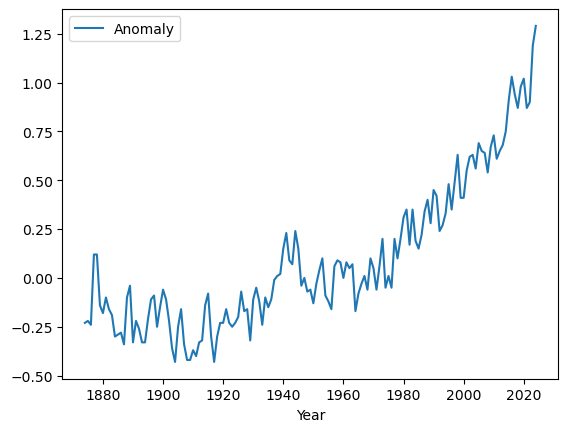

In [6]:
sns.lineplot(data)
plt.show()

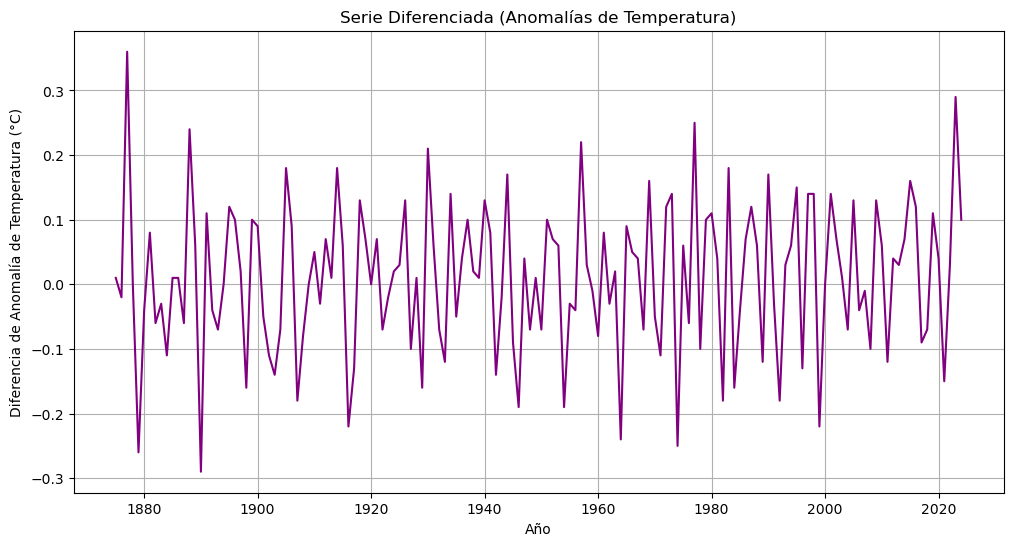

In [7]:
# Aplicar diferenciación de primer orden para eliminar la tendencia
data_diff = data["Anomaly"].diff().dropna()
data_diff_df = data_diff.reset_index()

# Graficar la serie diferenciada
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_diff_df, x="Year", y="Anomaly", color="purple")
plt.title("Serie Diferenciada (Anomalías de Temperatura)")
plt.xlabel("Año")
plt.ylabel("Diferencia de Anomalía de Temperatura (°C)")
plt.grid(True)
plt.show()

In [8]:
# Dado que las anomalías de temperatura incluyen valores negativos, la mejor opción es aplicar un modelo aditivo
data_de = seasonal_decompose(data, model='additive', period=12) 

In [9]:
data_de.seasonal

Year
1874-01-01   -0.021628
1875-01-01   -0.008430
1876-01-01   -0.011196
1877-01-01    0.036645
1878-01-01    0.013804
                ...   
2020-01-01   -0.011196
2021-01-01    0.036645
2022-01-01    0.013804
2023-01-01   -0.004983
2024-01-01   -0.041593
Name: seasonal, Length: 151, dtype: float64

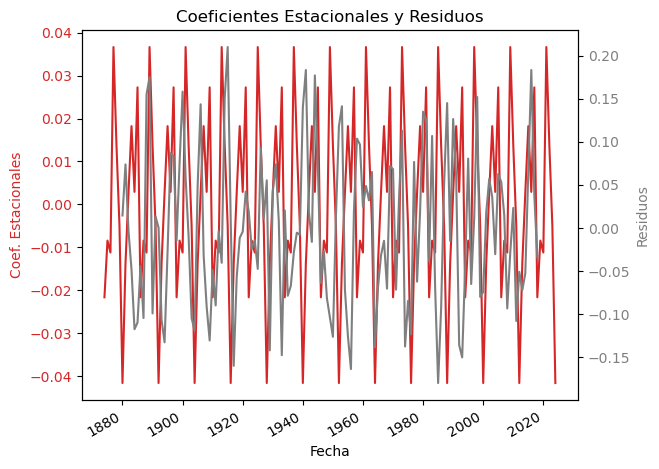

In [10]:
# Crear un gráfico con dos ejes y compartir el eje x
fig, ax1 = plt.subplots()

# Primera serie en el eje izquierdo (ax1)
color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Coef. Estacionales', color=color)
ax1.plot(data_de.seasonal, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=30, ha='right')
# Segunda serie en el eje derecho (ax2)
ax2 = ax1.twinx()  # Compartir el eje x
color = 'tab:grey'
ax2.set_ylabel('Residuos', color=color)
ax2.plot(data_de.resid, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustes de diseño
plt.title('Coeficientes Estacionales y Residuos')
plt.show()

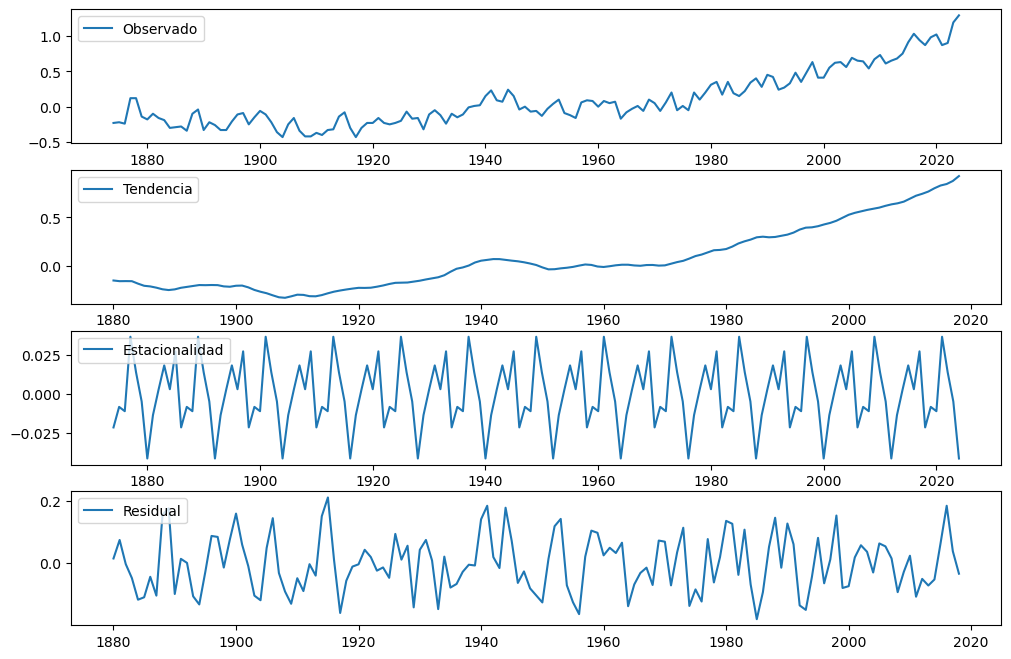

In [11]:
#al representarlo de la forma anterior, no se obseran las fechas en todos los gráficos, por lo que:
# Visualizar las componentes
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data_de.observed, label='Observado')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(data_de.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(data_de.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(data_de.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()

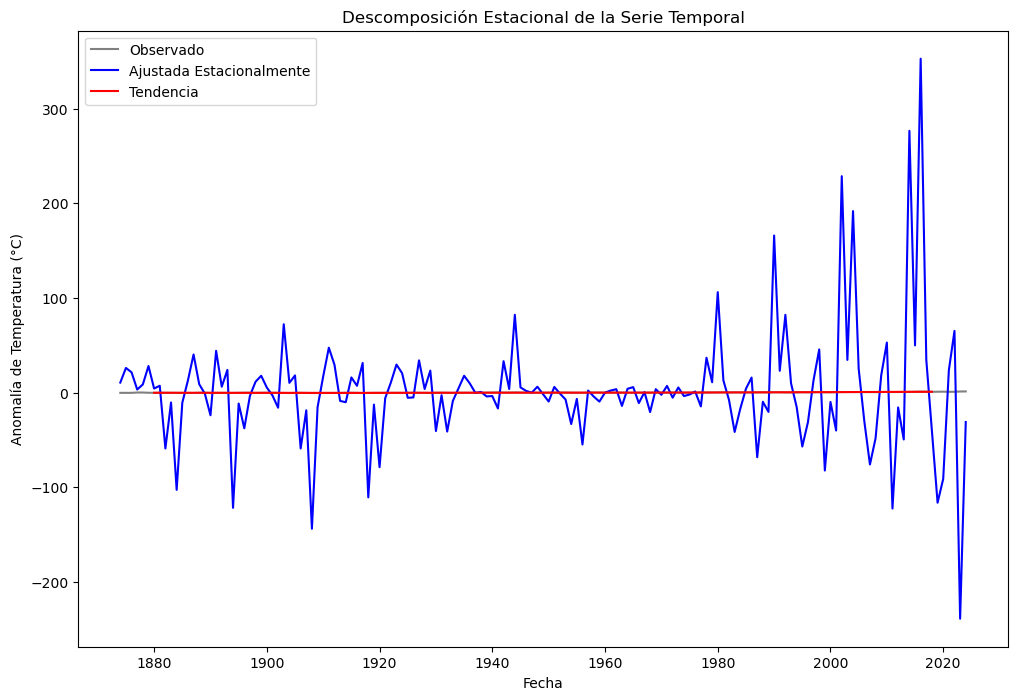

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar la descomposición estacional aditiva
result = seasonal_decompose(data["Anomaly"], model="additive", period=12)  # Asumiendo una periodicidad de 12 años

# Crear un gráfico que muestre las componentes
plt.figure(figsize=(12, 8))

# Serie observada
plt.plot(result.observed, label="Observado", color="grey")

# Serie ajustada estacionalmente (eliminando el componente estacional)
plt.plot(result.observed / result.seasonal, label="Ajustada Estacionalmente", color="blue")

# Tendencia
plt.plot(result.trend, label="Tendencia", color="red")

# Añadir leyendas y título
plt.legend()
plt.title("Descomposición Estacional de la Serie Temporal")
plt.xlabel("Fecha")
plt.ylabel("Anomalía de Temperatura (°C)")

# Mostrar el gráfico
plt.show()

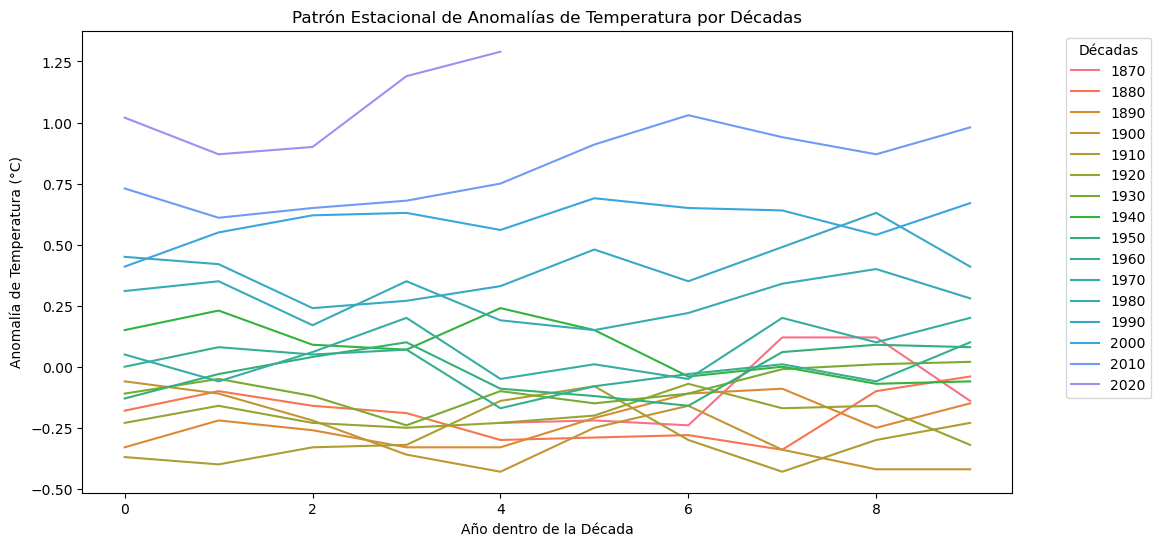

In [13]:
# Crear una serie temporal con el ciclo de 10 años correspondiente (sin modificar el DataFrame original)
decades = (data.index.year // 10) * 10

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.set_palette("husl", 20)

# Graficar los valores de anomalía de temperatura agrupados por década
for decade in decades.unique():
    data_decade = data.loc[decades == decade]  # Filtrar datos por década
    plt.plot(data_decade.index.year % 10, data_decade["Anomaly"], label=str(decade))

# Añadir leyendas y títulos
plt.legend(title="Décadas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Patrón Estacional de Anomalías de Temperatura por Décadas")
plt.xlabel("Año dentro de la Década")
plt.ylabel("Anomalía de Temperatura (°C)")

# Mostrar el gráfico
plt.show()

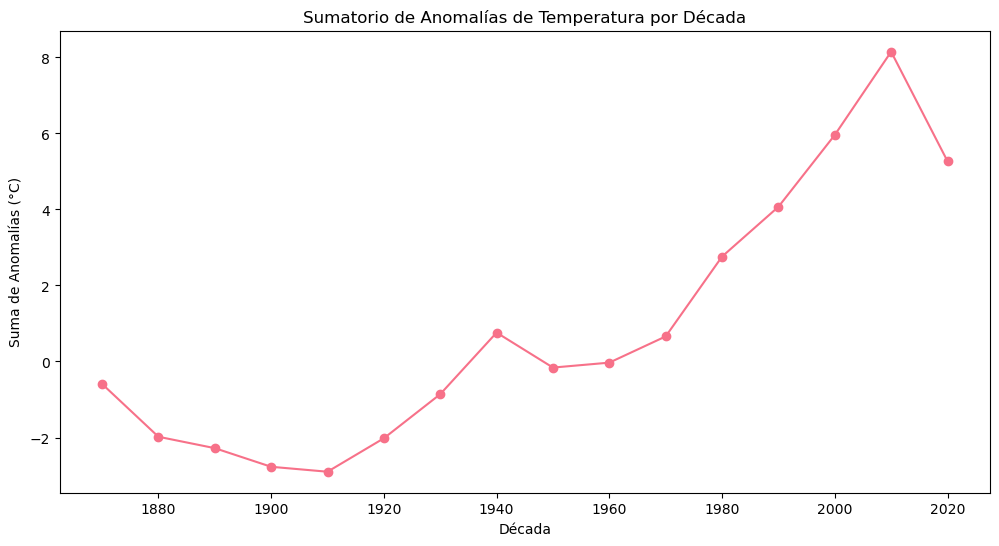

In [14]:
# Calcular el sumatorio de anomalías por década sin modificar el DataFrame original
sumatorio_por_decada = data.groupby(decades)["Anomaly"].sum()  # Agrupar y sumar

plt.figure(figsize=(12, 6))

# Utilizar la paleta "husl" de Seaborn
sns.set_palette("husl")

# Graficar el sumatorio de anomalías por década
plt.plot(sumatorio_por_decada.index, sumatorio_por_decada, marker="o", linestyle="-")

# Añadir leyendas y título
plt.title("Sumatorio de Anomalías de Temperatura por Década")
plt.xlabel("Década")
plt.ylabel("Suma de Anomalías (°C)")

# Mostrar el gráfico
plt.show()

In [15]:
# Separar los datos en conjunto de entrenamiento y prueba
# Reservamos las últimas 10 observaciones para validación
data_TR = data.iloc[:-10]  # Datos de entrenamiento (todas menos las últimas 10)

# Mostrar las últimas filas del conjunto de entrenamiento
data_TR.tail()

,Anomaly
Year,
2010-01-01,0.73
2011-01-01,0.61
2012-01-01,0.65
2013-01-01,0.68
2014-01-01,0.75


<Axes: xlabel='Year', ylabel='Anomaly'>

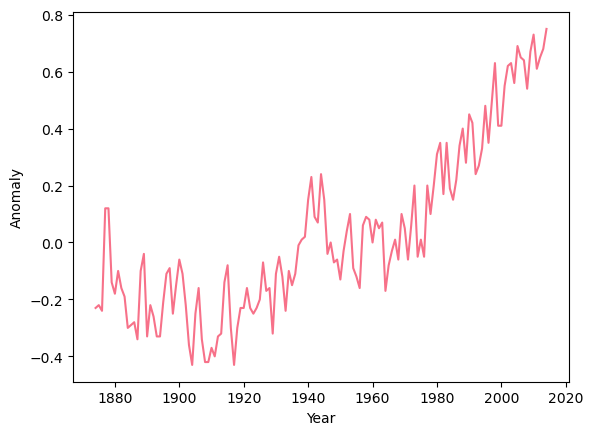

In [16]:
sns.lineplot(data_TR['Anomaly'])

Observo que la serie presenta una tendencia ascendente clara, pero no detecto un patrón estacional recurrente, por lo que la mejor opción es aplicar un alisado exponencial doble de Holt. Este método me permitirá modelar la tendencia de la serie y proyectarla en el futuro sin necesidad de un componente estacional, ya que no hay variaciones cíclicas evidentes en periodos fijos. Dado que el modelo de Holt captura la tendencia de manera efectiva, lo utilizaré para realizar predicciones sobre la evolución de las anomalías de temperatura en los próximos años.

In [17]:
# Si el modelo no tiene tendencia ni estacionalidad: alisado simple.
# Si el modelo tiene tendencia y no tiene estacionalidad: alisado doble.
# Si el modelo tiene tendencia y estacionalidad: alisado Holt-Winters.

In [18]:
# Aplicar el modelo de Holt (alisado exponencial doble)
modelo_holt = ExponentialSmoothing(data_TR["Anomaly"], trend="add", seasonal=None).fit()

# Obtener predicciones para los próximos 10 años
predicciones_holt = modelo_holt.forecast(steps=10)

# Mostrar la descripción del modelo ajustado
modelo_holt.summary()

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Anomaly,No. Observations:,141
Model:,ExponentialSmoothing,SSE,1.646
Optimized:,True,AIC,-619.531
Trend:,Additive,BIC,-607.736
Seasonal:,None,AICC,-618.904
Seasonal Periods:,None,Date:,"Thu, 20 Feb 2025"
Box-Cox:,False,Time:,17:26:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4363502,alpha,True
smoothing_trend,0.000000,beta,True


In [19]:
data_TST = data.iloc[-10:]
data_TST

,Anomaly
Year,
2015-01-01,0.91
2016-01-01,1.03
2017-01-01,0.94
2018-01-01,0.87
2019-01-01,0.98
2020-01-01,1.02
2021-01-01,0.87
2022-01-01,0.90
2023-01-01,1.19


In [20]:
predicciones_holt

2015-01-01    0.714889
2016-01-01    0.721325
2017-01-01    0.727760
2018-01-01    0.734196
2019-01-01    0.740631
2020-01-01    0.747067
2021-01-01    0.753503
2022-01-01    0.759938
2023-01-01    0.766374
2024-01-01    0.772809
Freq: YS-JAN, dtype: float64

In [21]:
modelo_holt.params

{'smoothing_level': 0.4363502349781109,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -0.19659618026371697,
 'initial_trend': 0.0064355660229547685,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

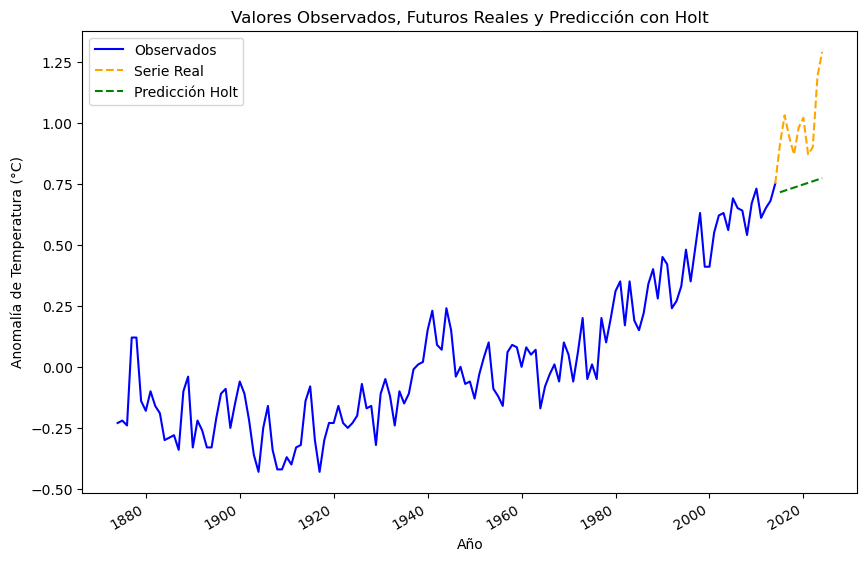

In [22]:
# Crear la visualización de las predicciones del modelo de Holt
plt.figure(figsize=(10, 6))

# Graficar los valores observados (datos de entrenamiento)
plt.plot(data_TR.index, data_TR["Anomaly"], label="Observados", linestyle="-", color="blue")

# Graficar la serie real (datos de prueba)
plt.plot(data.iloc[-11:].index, data.iloc[-11:]["Anomaly"], label="Serie Real", linestyle="--", color="orange")

# Graficar las predicciones del modelo de Holt
plt.plot(predicciones_holt.index, predicciones_holt, label="Predicción Holt", linestyle="--", color="green")

# Personalización del gráfico
plt.xlabel("Año")
plt.ylabel("Anomalía de Temperatura (°C)")
plt.title("Valores Observados, Futuros Reales y Predicción con Holt")
plt.legend()
plt.xticks(rotation=30, ha="right")

# Mostrar el gráfico
plt.show()

In [23]:
errores = abs(data_TST["Anomaly"]-predicciones_holt)
print(errores.head())

Year
2015-01-01    0.195111
2016-01-01    0.308675
2017-01-01    0.212240
2018-01-01    0.135804
2019-01-01    0.239369
dtype: float64


(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

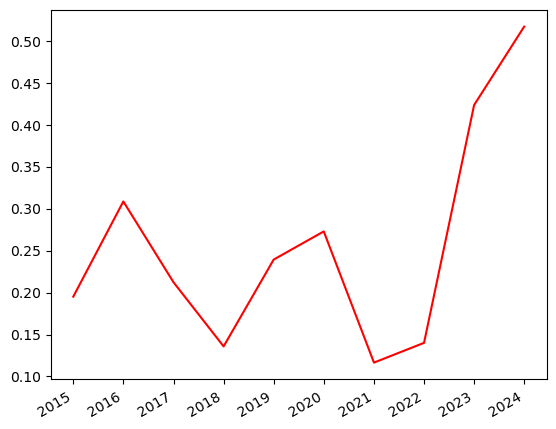

In [24]:
# esto nos permite conocer en qué años se cometieron más errores
plt.plot(errores, label='errores', linestyle='-', color='red')
plt.xticks(rotation=30, ha='right')

In [25]:
mae = np.mean(errores)
print(mae)

0.2561507594537472


In [26]:
data_diff_TR = data_diff.iloc[:-10]  # Datos de entrenamiento (todas menos las últimas 10)

# Mostrar las últimas filas del conjunto de entrenamiento
data_diff_TR.tail()

Year
2010-01-01    0.06
2011-01-01   -0.12
2012-01-01    0.04
2013-01-01    0.03
2014-01-01    0.07
Name: Anomaly, dtype: float64

In [27]:
print(pred_final)

NameError: name 'pred_final' is not defined

In [ ]:

# Ajustar el modelo de Holt sobre los datos diferenciados
modelo_holt_diff = ExponentialSmoothing(data_diff_TR, trend="add", seasonal=None).fit()

# Obtener predicciones diferenciadas
pred_diff = modelo_holt_diff.forecast(steps=10)

# Reconstruir la serie original sumando las diferencias acumuladas al último valor conocido
ultimo_valor_original = data_TR["Anomaly"].iloc[-1]  # Último valor antes de la predicción
pred_final = ultimo_valor_original + pred_diff.cumsum()  # Revertir la diferenciación

# Asegurar que las fechas coincidan con el conjunto de prueba
pred_final.index = data_TST.index

# Mostrar las predicciones corregidas
pred_final

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Year
2015-01-01    0.767060
2016-01-01    0.784262
2017-01-01    0.801607
2018-01-01    0.819095
2019-01-01    0.836725
2020-01-01    0.854498
2021-01-01    0.872414
2022-01-01    0.890472
2023-01-01    0.908673
2024-01-01    0.927017
dtype: float64

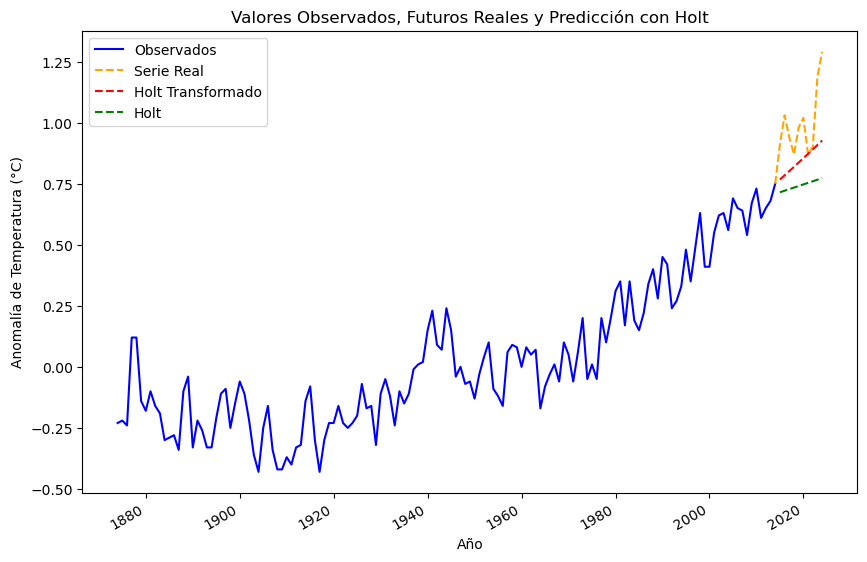

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_TR.index, data_TR["Anomaly"], label='Observados', linestyle='-', color='blue')
plt.plot(data.iloc[-11:].index, data.iloc[-11:]["Anomaly"], label='Serie Real', linestyle='--', color='orange')
plt.plot(pred_final.index, pred_final, label='Holt Transformado', linestyle='--',color='red')
plt.plot(predicciones_holt.index, predicciones_holt, label='Holt', linestyle='--',color='green')
plt.xlabel("Año")
plt.ylabel("Anomalía de Temperatura (°C)")
plt.title("Valores Observados, Futuros Reales y Predicción con Holt")
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()